#Carregando modelo

In [39]:
!python3 -m pip install seaborn
!python3 -m pip install pydot


7457.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


7464.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [35]:
import os
import glob
import sys


from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
@tf.function
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [7]:
my_classes = ['Sound_Guitar', 'Sound_Drum', 'Sound_Violin', 'Sound_Piano']
map_class_to_id = {class_name: index for index, class_name in enumerate(my_classes)}
map_class_to_id

{'Sound_Guitar': 0, 'Sound_Drum': 1, 'Sound_Violin': 2, 'Sound_Piano': 3}

In [ ]:
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

In [26]:
def predict(testing_wav_file_name, my_model):
    testing_wav_data = load_wav_16k_mono(testing_wav_file_name)
    scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
    result = my_model(embeddings).numpy()
    return my_classes[result.mean(axis=0).argmax()]

In [22]:
#carrega o dataset de teste
test_csv = './datasets/dataset-16bit/Metadata_Test.csv'
base_data_path = './datasets/dataset-16bit/Test16'

pd_data_test = pd.read_csv(test_csv)
pd_data_test['FileName'] = pd_data_test['FileName'].apply(lambda row: os.path.join(base_data_path, row))
pd_data_test.head(10)

In [ ]:
pd_data_test

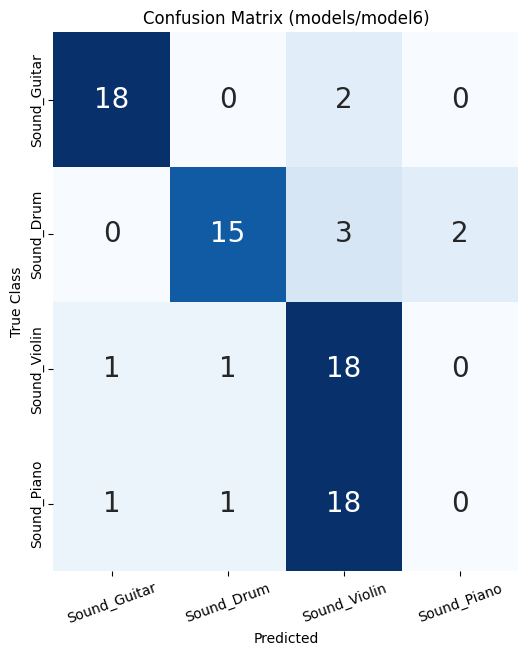

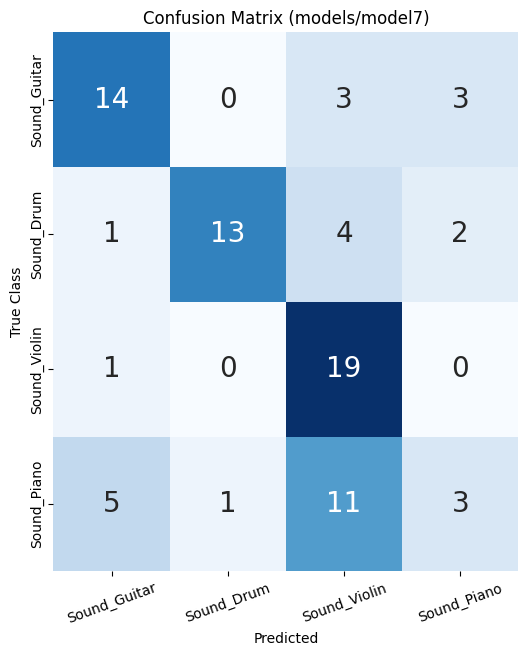

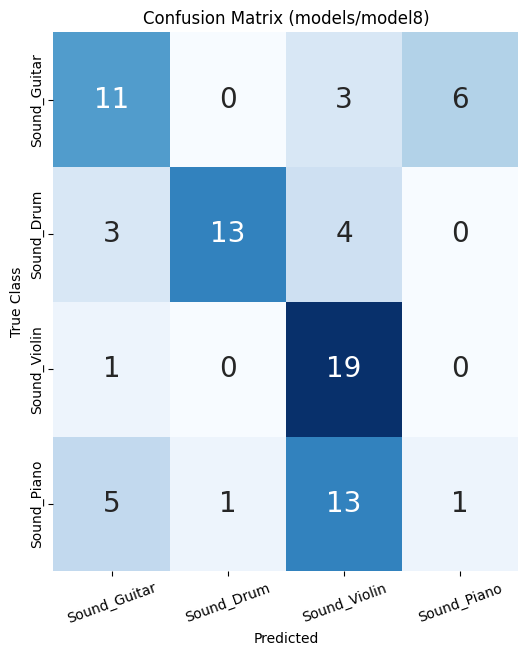

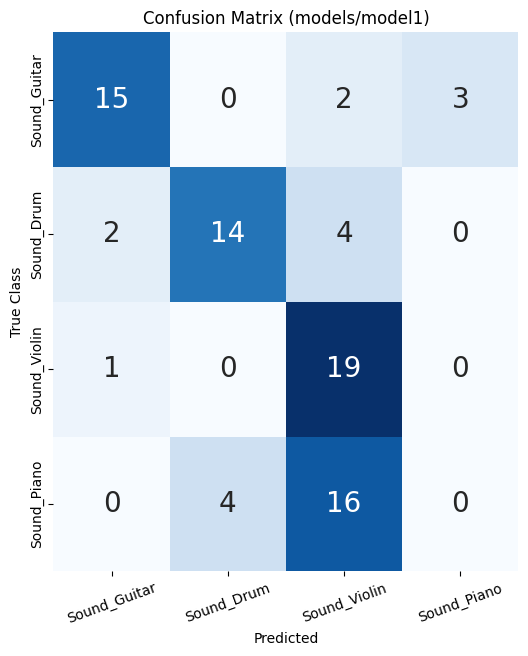

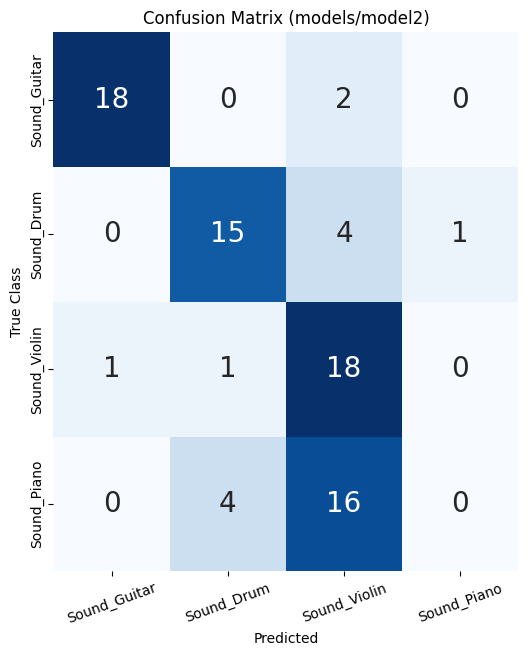

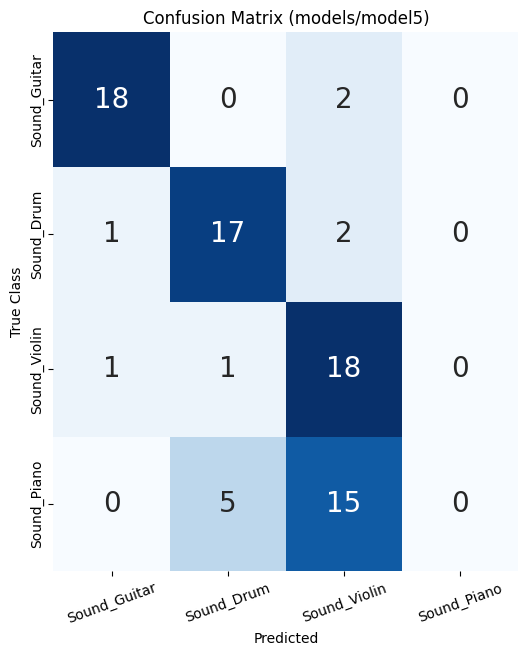

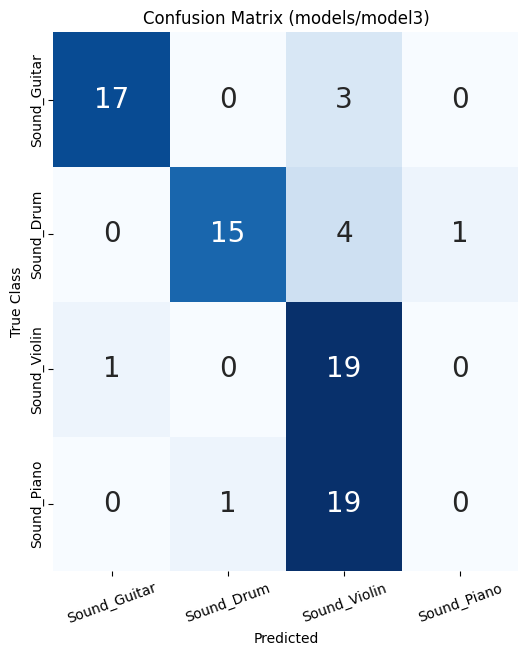

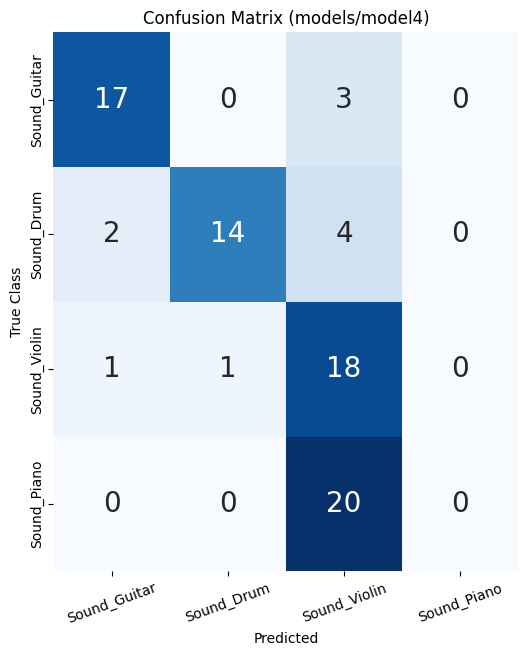

In [82]:
model_dirs = glob.glob('models/*')
#model_dirs = [model_dirs[0]]

for model_dir in model_dirs:
    if os.path.isfile(model_dir):
        continue
     
    #Carregando o modelo
    my_model = tf.keras.models.load_model(model_dir)

    # Aplica a função de previsão e cria uma nova coluna 'Predicted' no dataframe
    pd_data_test['Predicted'] = pd_data_test['FileName'].apply(lambda x: predict(x, my_model))

    # Calculando a matriz de confusão
    conf_mat = confusion_matrix(pd_data_test['Class'], pd_data_test['Predicted'])

    # Visualizando a matriz de confusão usando Seaborn
    plt.figure(figsize=(6, 7))  # Altere o tamanho da figura para deixar o gráfico mais compacto
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=my_classes, yticklabels=my_classes, cbar=False, annot_kws={"fontsize": 20})
    plt.xlabel('Predicted')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix (' + model_dir + ')')

    # Rotacione o texto do eixo x em 45 graus
    plt.xticks(rotation=20)

    plt.savefig(model_dir + '.png')


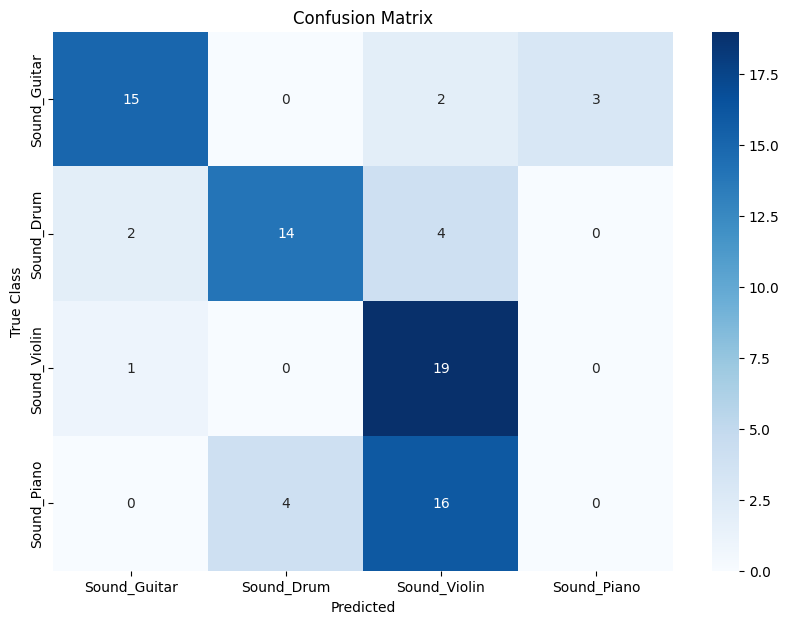

In [58]:
#!python3 -m pip install pydot
#!python3 -m pip install pydotplus
!python3 -m pip install graphviz

7872.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     |████████████████████████████████| 47 kB 6.4 MB/s  eta 0:00:01


In [73]:
from keras.utils import plot_model
plot_model(my_model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [36]:
import os
import glob
import tensorflow as tf

model_dirs = glob.glob('models/*')

for model_dir in model_dirs:
    if os.path.isfile(model_dir):
        continue

    # Carregando o modelo
    my_model = tf.keras.models.load_model(model_dir)

    # Salvando o summary do modelo em um arquivo txt
    with open(model_dir + '_summary.txt', 'w') as summary_file:
        # Armazenando a saída padrão atual
        original_stdout = sys.stdout

        # Redirecionando a saída padrão para o arquivo
        sys.stdout = summary_file

        # Chamando o método summary()
        my_model.summary()

        # Restaurando a saída padrão original
        sys.stdout = original_stdout


In [ ]:
def plot_graphs(history, metric): plt.plot(history.history[metric]) plt.plot(history.history['val_'+metric], '')